# Lung Cancer Identification Machine

## Identitas Pengembang

Identitas Ketua :

    Nama : Sendy Joan Kevin
    NIM  : 2041720121
    
Identitas Anggota :
    
    Nama : Muhammad Al Husein
    NIM  : 2041720040
    
    Nama : Rizka Musyarofatul Hidayah
    NIM  : 2041720095

## Penjelasan Awal Mengenai Mesin

## Metode Yang Digunakan

Metode yang kami gunakan dalam melakukan pembelajaran mesin mengenai Kanker Paru-paru ini adalah Decision Tree dan K Nearest Neighbor. 

Sekilas mengenai metode yang kami gunakan adalah sebagai berikut :
1. Decision Tree

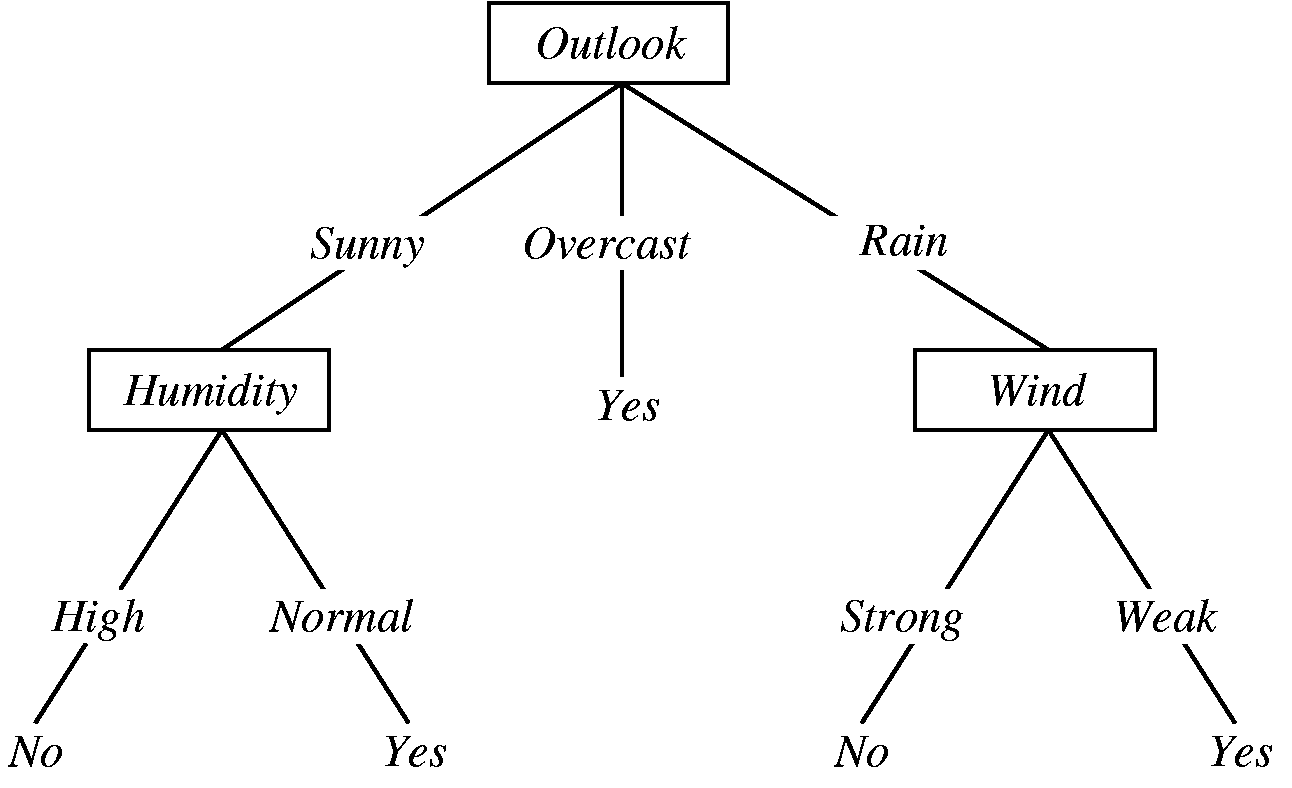
Decision Tree adalah metode pengklasifikasi yang diekspresikan sebagai partisi rekursif dari ruang instance. Pohon keputusan terdiri dari simpul-simpul yang membentuk pohon berakar, artinya pohon yang diarahkan dengan simpul yang disebut "akar" yang tidak memiliki sisi masuk. Semua node lain memiliki tepat satu sisi masuk. Node dengan tepi keluar disebut internal atau test node. Semua node lainnya disebut daun (juga dikenal sebagai node terminal atau keputusan). Dalam pohon keputusan, setiap node internal membagi ruang instance menjadi dua atau lebih sub-ruang sesuai dengan fungsi diskrit tertentu dari nilai atribut masukan. Dalam kasus yang paling sederhana dan paling sering, setiap pengujian mempertimbangkan satu atribut, sehingga ruang instance dipartisi menurut nilai atribut. Dalam kasus atribut numerik, kondisi mengacu pada rentang. **Dalam implementasinya metode ini sangat sensitif kepada penentuan jumlah max_depth yang digunakan**

2. K Nearest Neighbor

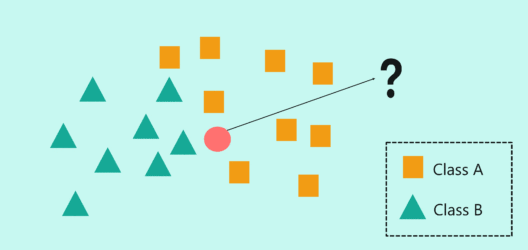
K-nearest neighbor (KNN) adalah jenis algoritma pembelajaran terawasi yang digunakan untuk regresi dan klasifikasi. KNN mencoba memprediksi kelas yang benar untuk data uji dengan menghitung jarak antara data uji dan semua titik latih. Kemudian pilih K jumlah titik yang paling dekat dengan data uji. Algoritma KNN menghitung probabilitas data uji yang termasuk dalam kelas data latih 'K' dan kelas yang memiliki probabilitas tertinggi akan dipilih. Dalam kasus regresi, nilainya adalah rata-rata dari poin pelatihan yang dipilih 'K'. **Dalam implementasinya metode ini sangat sensitif kepada penentuan jumlah n yang digunakan**

## Output Yang Diharapkan

Dari metode yang telah digunakan diharapkan dapat memiliki nilai akurasi lebih dari 0.8 atau 80%

## Coding Step

### Persiapan 

Sebelum melakukan coding secara menyeluruh maka kita perlu mempersiapkan beberapa hal mulai dari dataset, package-package yang akan kita gunakan, cleaning data pada proses ini. 

### Import Package and Data

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix

Dari beberapa package yang di import dapat dijelaskan sebagai berikut :
1. Pandas digunakan untuk membaca data dari file csv
2. Numpy digunakan untuk
3. Pyplot digunakan untuk membuat plot dari dataset
4. LabelEncoder akan digunakan sebagai salah satu tools dalam melakukan cleaning data yakni membuat data object menjadi angka
5. train_test_split digunakan untuk membagi dataset menjadi data training dan data testing
6. DecisionTreeClasifier digunakan untuk menjalankan function DecisionTree
7. KNeighborsClasifier digunakan untuk menjalankan function KNeighborsClasifier
8. accuracy_score digunakan untuk menjalankan pengetesan akurasi pada metode yang telah diberikan
9. tree digunakan untuk melakukan visualisasi hasil algoritma decisiontreenya
10. metrics nantinya digunakan untuk membuat matrix pada Confussion Matrix
11. clasification_report digunakan untuk memberikan laporan terhadap hasil dari perhitungan menggunakan metode yang dicoba
12. confusion_matrix digunakan untuk membuat visualisasi matrix sehingga diketahui dari testing yang berhasil dan gagal

In [86]:
data = pd.read_csv("dataset_lung_cancer.csv")
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


Pada step diatas adalah melakukan read data dari csv atau dataset yang sebelumnya telah kita siapkan yakni dataset_lung_cancer.csv yang mana data yang di load atau dibaca adalah data mentah langsung dari csv sehingga belum diketahui apakah ada nilai null dari data tersebut dan sebagainya.

### Visualisasi Raw Data

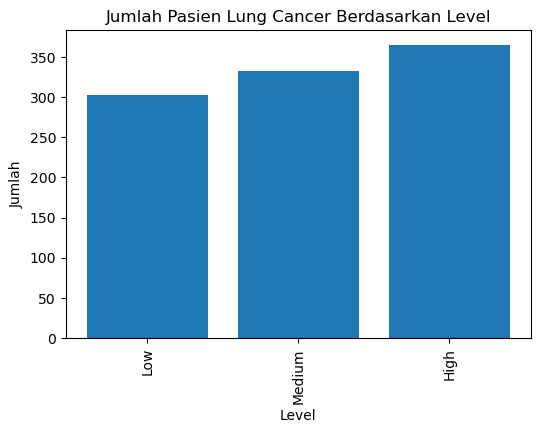

In [87]:
vis1 = data.groupby(['Level']).count().reset_index()
vis1.sort_values('Patient Id', ascending=True, inplace=True)
fig = plt.figure(figsize=(6,4))
ax = plt.axes()
plt.ylabel('Jumlah')
plt.xlabel('Level')
plt.title('Jumlah Pasien Lung Cancer Berdasarkan Level')
ax.bar(vis1['Level'],vis1['Patient Id'])
plt.xticks(rotation=90)
plt.show()

Pada tahap ini adalah menampilkan data tadi untuk melihat banyaknya penderita kanker paru-paru pada masing-masing level baik low, medium, hingga high.

In [88]:
vis1.head()

,Level,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
1,Low,303,303,303,303,303,303,303,303,303,...,303,303,303,303,303,303,303,303,303,303
2,Medium,332,332,332,332,332,332,332,332,332,...,332,332,332,332,332,332,332,332,332,332
0,High,365,365,365,365,365,365,365,365,365,...,365,365,365,365,365,365,365,365,365,365


Pada tahap ini digunakan untuk menampilkan banyaknya penderita kanker paru-paru pada masing-masing level menggunakan tertulis nilai

### Cleaning Data

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

Sebelum melakukan cleaning data maka kita perlu melihat tipe data pada dataset tersebut. 

Terlihat bahwasannya pada data tersebut ada beberapa variabel yang dapat kita hapus yakni data index yang memberikan urutan numerik pada masing masing data. selain itu terdapat variabel Patient Id yang mana memiliki nilai berbeda pada masing" pasien dan digunakan untuk penomoran rumah sakit. Maka kedua variabel tersebut dapat kita lakukan drop dengan cara data.drop pada code dibawah ini.

In [90]:
data = data.drop(columns=['index', 'Patient Id'])
data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


Setelah melakukan drop data maka kita perlu melihat kembali apakah data yang ada pada data set tersebut sudah siap kita olah atau belum menggunakan function info

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

Dari function info data tersebut mayoritas adalah numerik dan juga variabel Level dengan tipe objek sehingga nantinya kita perlu melakukan pengecekan terlebih dahulu apakah ada nilai null atau na dalam data tersebut serta mengubah variabel Level menjadi numerik dengan encoder.

In [92]:
data.isna().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

Dari data diatas diketahui bahwa data tersebut tidak memiliki nilai null atau na sehingga tidak perlu melakukan clean data na atau null.

In [93]:
data['Level'] = encode.fit_transform(data['Level'])
data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,0
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,0
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,0


Selanjutnya adalah menggunakan encode untuk merubah variabel Level menjadi numerik. dengan permisalan Low = 10, high = 11 dsb. namun pada penjalanan mesin maka mesin secara otomatis akan melakukan encode 0,1,2 seperti yang tertampil pada data.head()

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

Setelah melakukan data cleaning maka langkah terakhir adalah melakukan pengecekan kembali apakah data sudah cocok digunakan kedalam mesin. terlihat bahwa keseluruhan data telah siap dan tidak ada nilai null atau na maka langkah selanjutnya adalah spliting data.

### Splitting Data 

In [95]:
X = data.iloc[:,2:-1]
y = data['Level']

Dari code diatas maka dapat diketahui bahwasannya kita menggunakan Variabel X yang dimulai dari Age sampai dengan Snoring. dan variabel Y adalah Level.

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Dari data diatas maka kami menggunakan 80% sebagai data Train dan 20% sebagai data train

### Metode Decision Tree

In [97]:
dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0,
            random_state=1538259045, splitter='best')

# Sesuaikan dt ke set training
dt.fit(X_train, y_train)

# Memprediksi label set test
y_pred_dt = dt.predict(X_test)

#  menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Metode Decision Tree")
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Metode Decision Tree
Test set accuracy: 1.00
Test set accuracy: 1.0


Dalam melakukan Decision Tree kami menggunakan function yang sebelumnya telah di import yakni DecisionTreeClasifier. dan mendapatkan nilai sebesar 1.0 atau 100%. jika kita menggunakan max_depth dibawah 6 maka nilai akurasinya akan berkurang. sebagai contoh seperti dibawah ini 

In [98]:
dt2 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0,
            random_state=1538259045, splitter='best')

# Sesuaikan dt ke set training
dt2.fit(X_train, y_train)

# Memprediksi label set test
y_pred_dt2 = dt2.predict(X_test)

#  menghitung set accuracy
acc_dt2 = accuracy_score(y_test, y_pred_dt2)
print("Metode Decision Tree")
print("Test set accuracy: {:.2f}".format(acc_dt2))
print(f"Test set accuracy: {acc_dt2}")

Metode Decision Tree
Test set accuracy: 0.83
Test set accuracy: 0.83


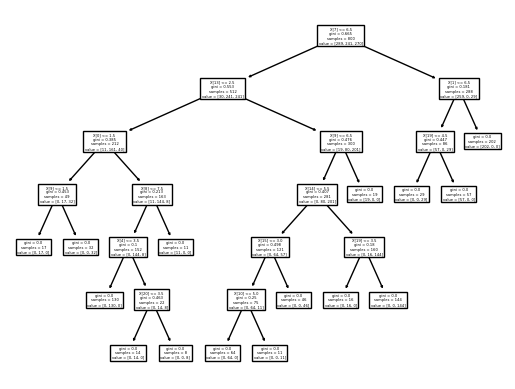

In [99]:
tree.plot_tree(dt);

Jika kita menggunakan dt2 sebagai visualisasi maka akan muncul visual sebagai berikut

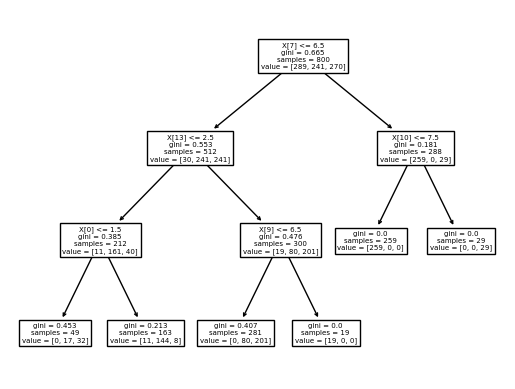

In [100]:
tree.plot_tree(dt2);

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        62

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



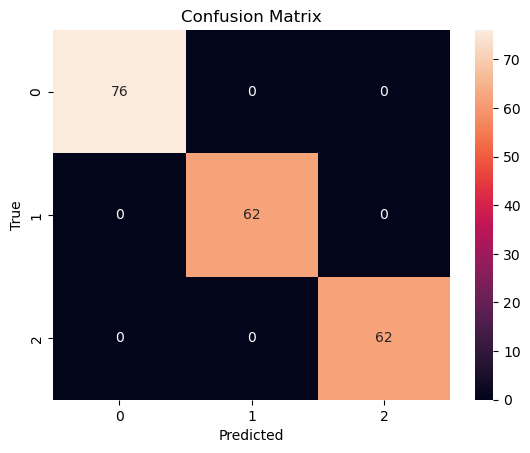

In [101]:
matrix = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred_dt))

Nilai confussion matrix pada metode Decision Tree adalah seperti ditampilkan diatas

### Metode K-Nearst Neighboard 

C:\Users\Johan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Johan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Johan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Johan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Johan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Johan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0, 0.5, 'Error rata-rata')

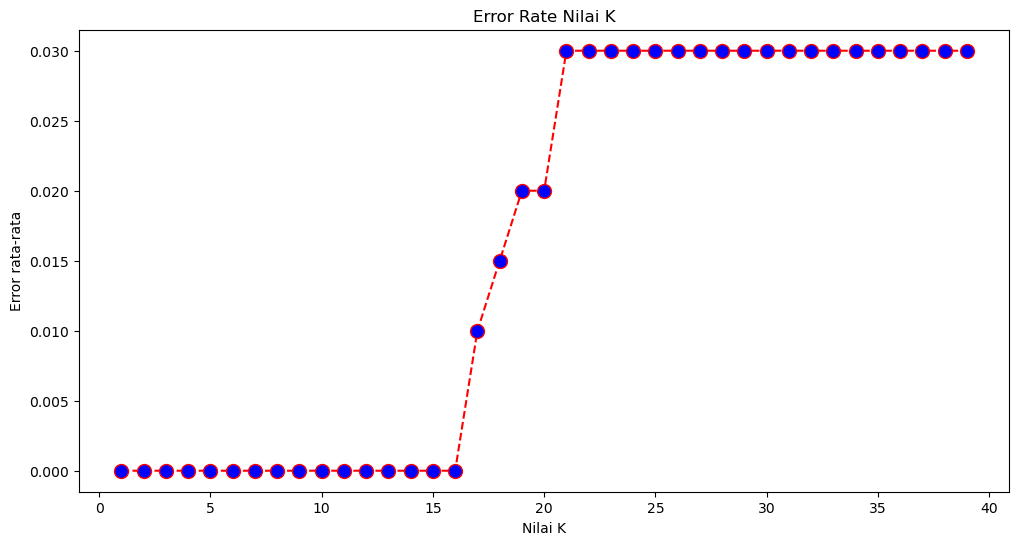

In [102]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')  
plt.xlabel('Nilai K')  
plt.ylabel('Error rata-rata') 

Pada code diatas kami melakukan uji coba untuk mengetahui nilai n yang cocok digunakan dan didapatkan kesimpulan bahwasannya nilai k yang sesuai digunakan adalah antara nilai 1 - 16. untuk itu kami memilih 15 sebagai nilai n

In [103]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train, y_train)

# Memprediksi label set test
y_pred_knn = knn.predict(X_test)

#  menghitung set accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Metode K-Nearst Neighboard")
print("Test set accuracy: {:.2f}".format(acc_knn))
print(f"Test set accuracy: {acc_knn}")

Metode K-Nearst Neighboard
Test set accuracy: 1.00
Test set accuracy: 1.0


C:\Users\Johan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Setelah dilakukan perhitungan maka kami mendapatkan nilai akurasi sebesar 1.0 atau 100%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        62

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



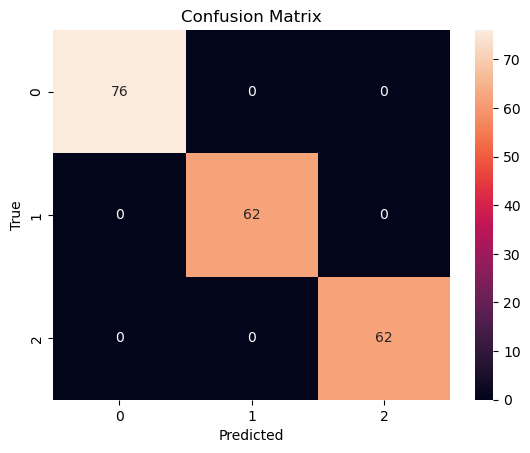

In [104]:
matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred_knn))

Nilai confussion matrix pada metode knn adalah seperti ditampilkan diatas